# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# Data visualization

<AxesSubplot:>

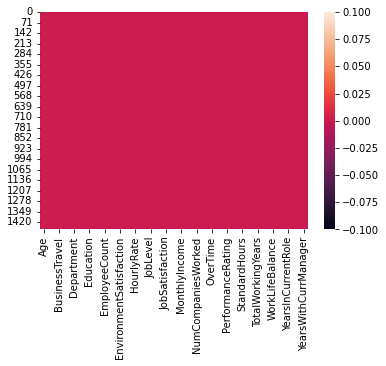

In [7]:
sns.heatmap(df.isnull())

No     1233
Yes     237
Name: Attrition, dtype: int64


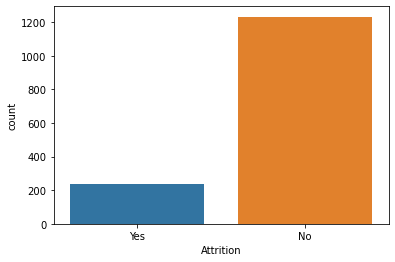

In [8]:
sns.countplot(x=df['Attrition'])
print(df['Attrition'].value_counts())


Male      882
Female    588
Name: Gender, dtype: int64


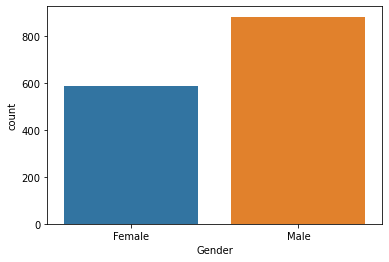

In [9]:
sns.countplot(x=df['Gender'])
print(df['Gender'].value_counts())

males are more than than the females.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


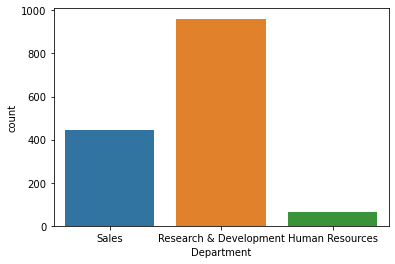

In [10]:
sns.countplot(x=df['Department'])
print(df['Department'].value_counts())

more people are in research & development department.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


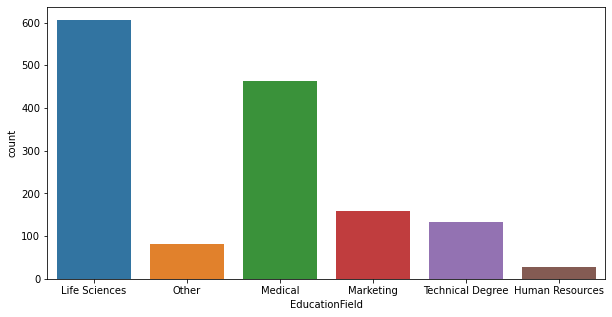

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['EducationField'])
print(df['EducationField'].value_counts())

most peoples are from life sciences background and least are from human resource.

<AxesSubplot:xlabel='Over18', ylabel='count'>

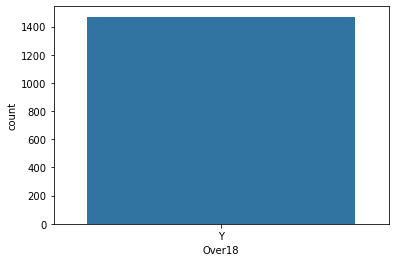

In [12]:
sns.countplot(x=df['Over18'])

all the population are above 18 so we can drop this column as there is no use of this.

In [13]:
df.drop(['Over18'],axis=1,inplace=True)

<AxesSubplot:>

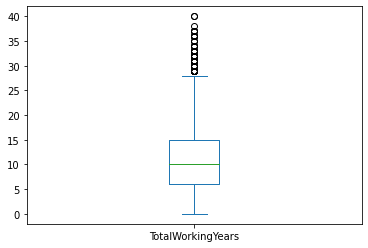

In [14]:
df['TotalWorkingYears'].plot.box()

<AxesSubplot:>

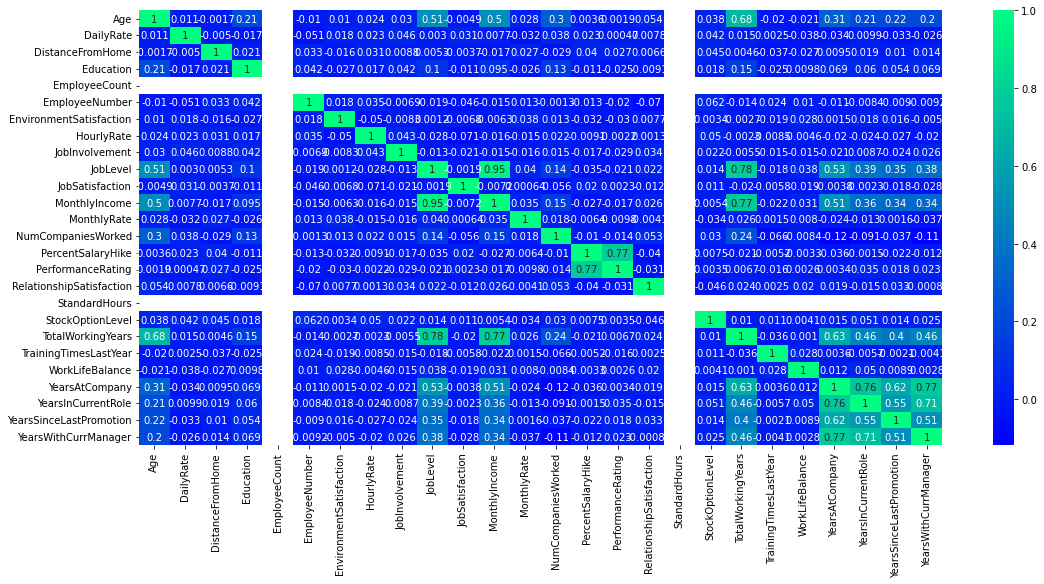

In [15]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='winter')

In [16]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [17]:
df['JobLevel']=np.log1p(df['JobLevel'])

In [18]:
df['YearsSinceLastPromotion']=np.log1p(df['YearsSinceLastPromotion'])

In [19]:
df['YearsAtCompany']=np.log1p(df['YearsAtCompany'])

In [20]:
df['PerformanceRating']=np.log1p(df['PerformanceRating'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

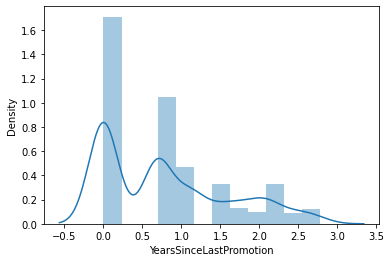

In [21]:
sns.distplot(df['YearsSinceLastPromotion'])

In [22]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.718805
YearsWithCurrManager        0.833451
dtype: float64

correcting all the skewness.

Age  Attrition
18   No            4
     Yes           4
19   Yes           6
     No            3
20   Yes           6
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Name: Attrition, Length: 82, dtype: int64


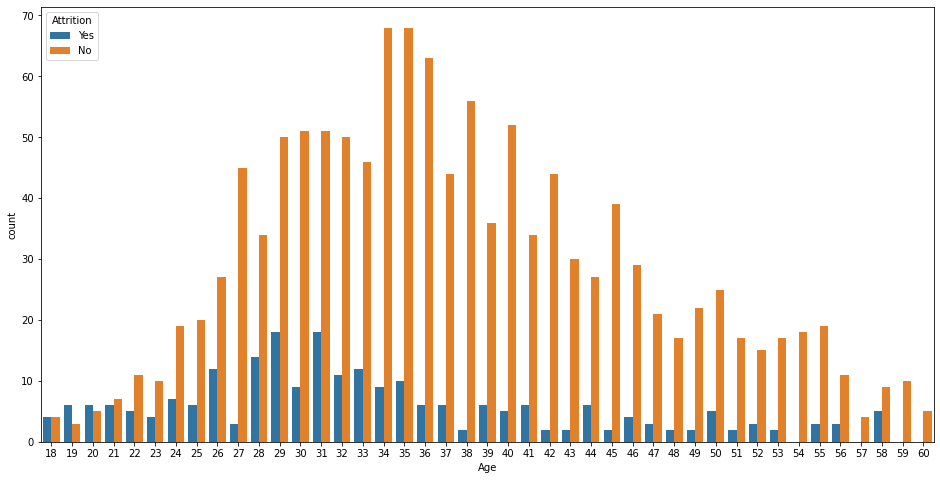

In [23]:
plt.figure(figsize=(16,8))
sns.countplot(x='Age',hue='Attrition',data=df)
print(df.groupby('Age')['Attrition'].value_counts())

age wise attrition rate.

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


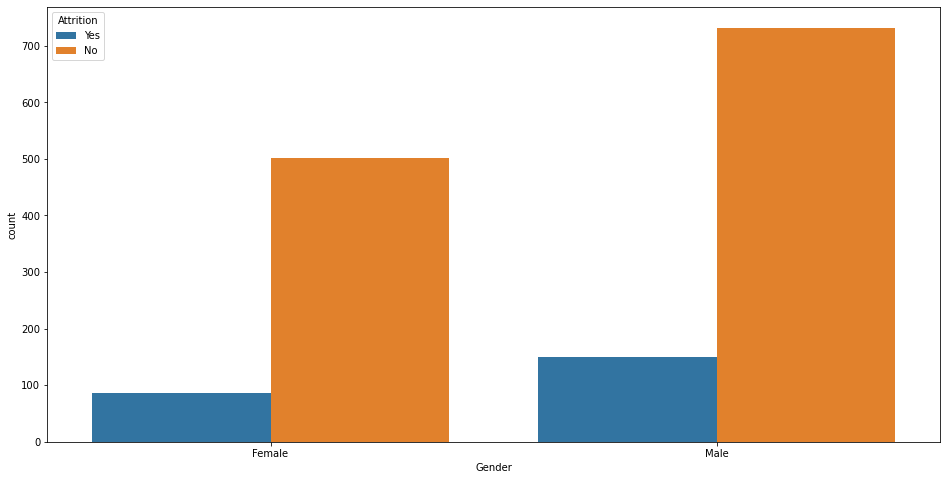

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x='Gender',hue='Attrition',data=df)
print(df.groupby('Gender')['Attrition'].value_counts())

more males have left the company then females.

<AxesSubplot:xlabel='Age', ylabel='HourlyRate'>

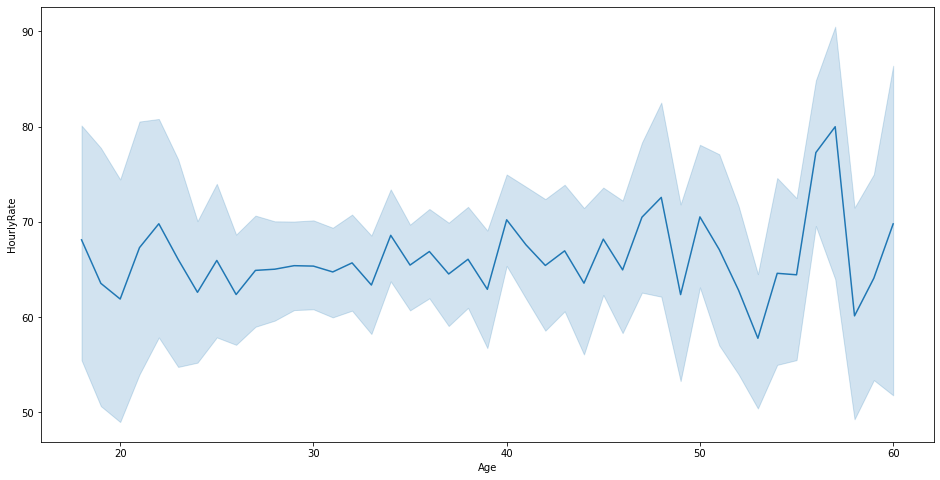

In [25]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Age',y='HourlyRate',data=df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='DailyRate'>

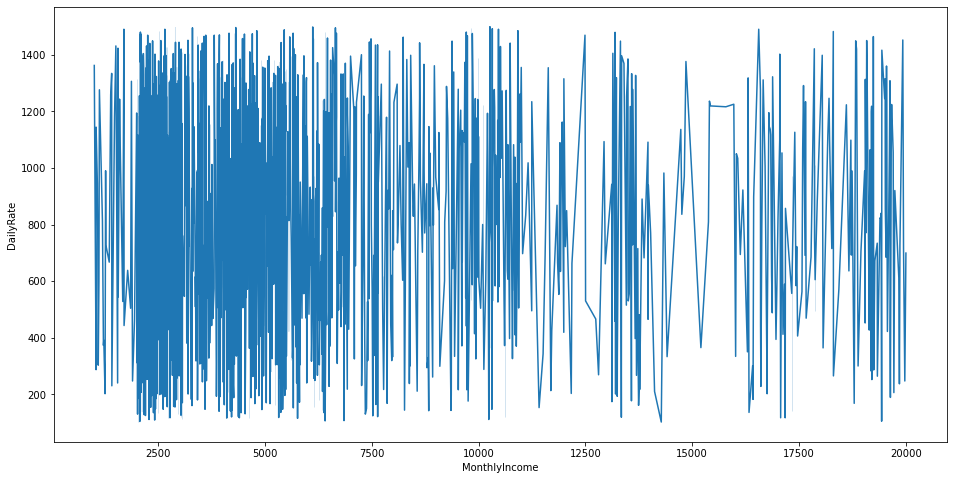

In [26]:
plt.figure(figsize=(16,8))
sns.lineplot(y='DailyRate',x='MonthlyIncome',data=df)

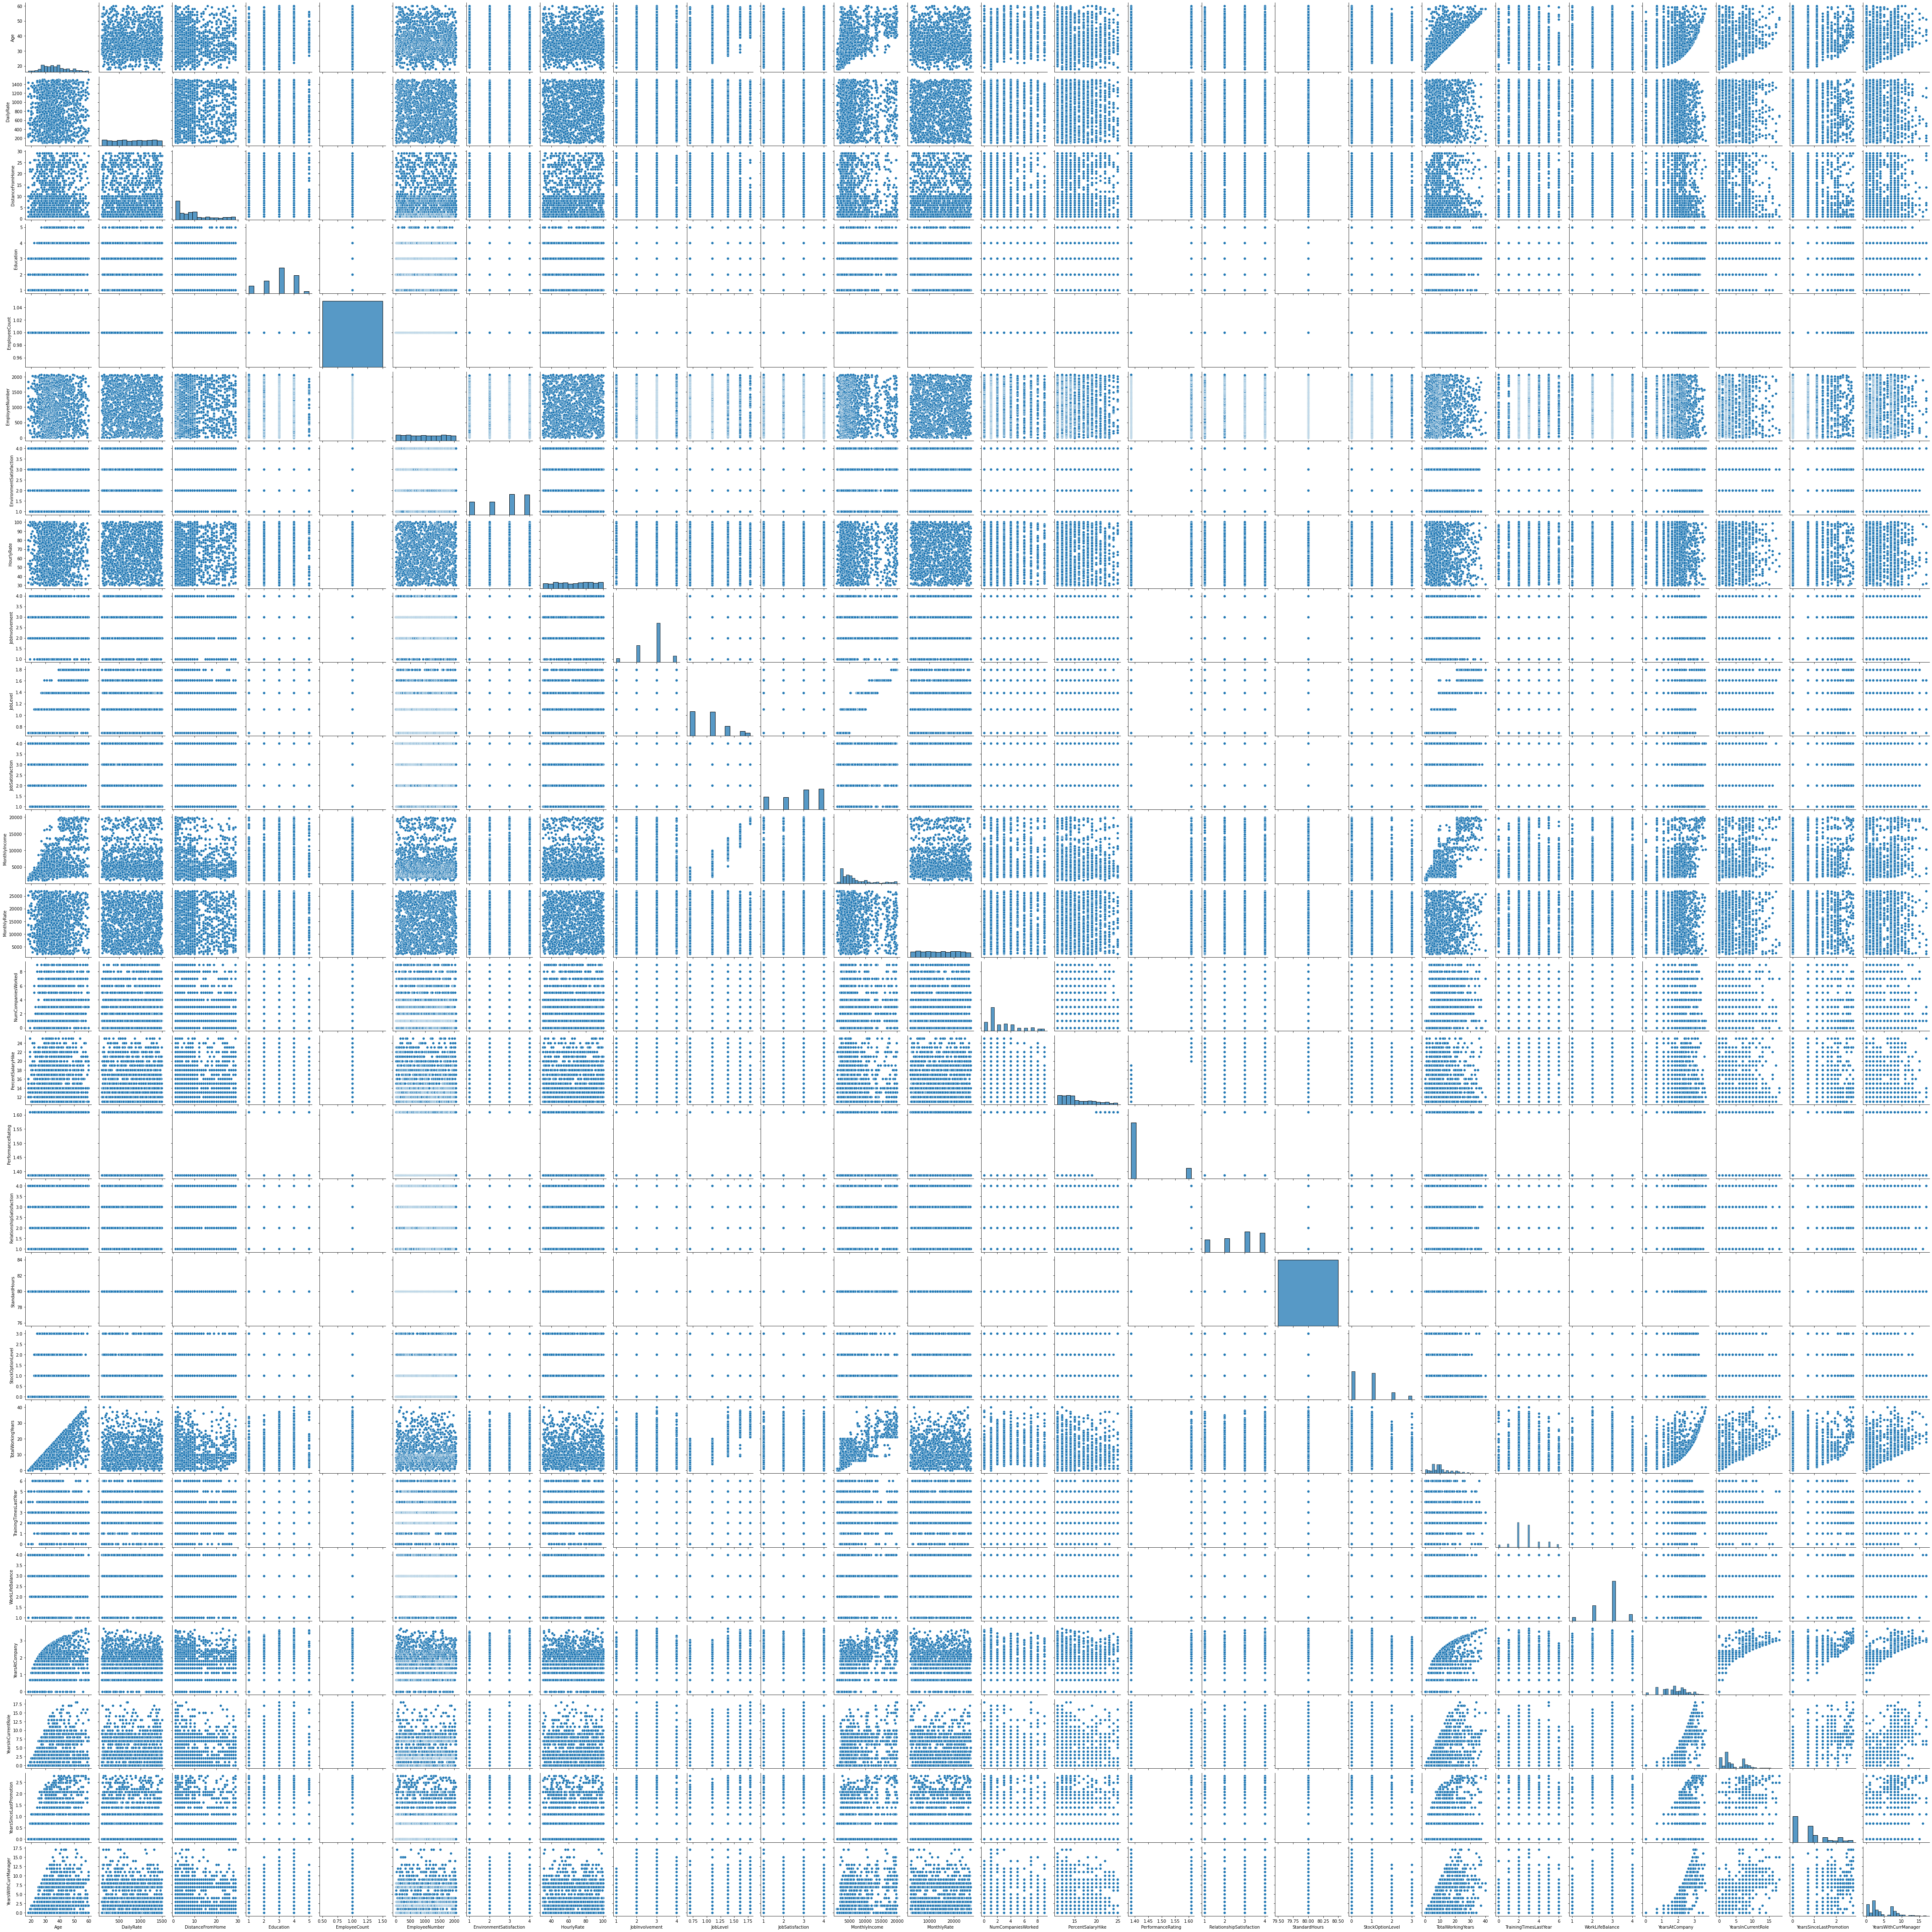

In [27]:
sns.pairplot(df)

<AxesSubplot:xlabel='Department', ylabel='count'>

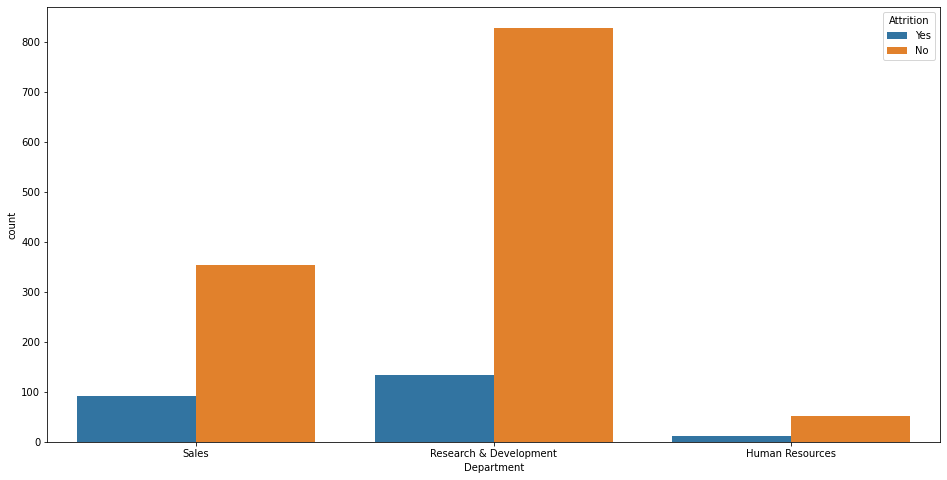

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(x='Department',hue='Attrition',data=df)

people who are in reseach department have more attrition rate

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

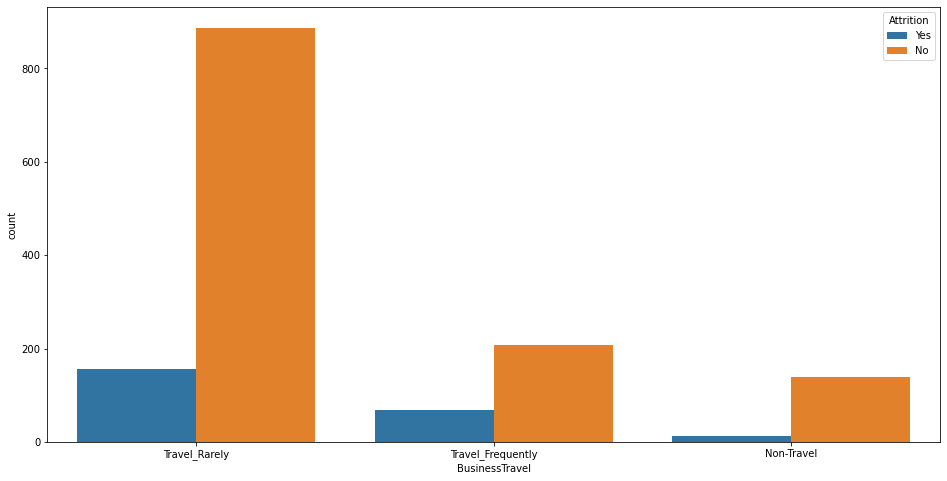

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

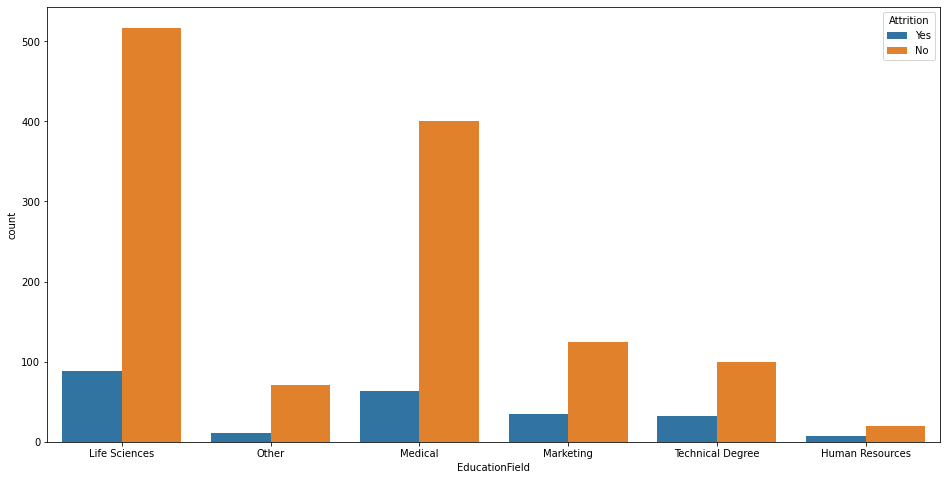

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(x='EducationField',hue='Attrition',data=df)

people who are in life sciences have more attrition rate

In [32]:
df.drop(['Age'],axis=1,inplace=True)

In [33]:
df['StandardHours'].unique()

array([80])

In [34]:
df.drop(['StandardHours'],axis=1,inplace=True)

In [35]:
df['EmployeeCount'].unique()

array([1])

In [36]:
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [37]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [38]:
df.drop(['EmployeeNumber'],axis=1,inplace=True)

In [39]:
df

Attrition     BusinessTravel  DailyRate              Department  \
0          Yes      Travel_Rarely       1102                   Sales   
1           No  Travel_Frequently        279  Research & Development   
2          Yes      Travel_Rarely       1373  Research & Development   
3           No  Travel_Frequently       1392  Research & Development   
4           No      Travel_Rarely        591  Research & Development   
...        ...                ...        ...                     ...   
1465        No  Travel_Frequently        884  Research & Development   
1466        No      Travel_Rarely        613  Research & Development   
1467        No      Travel_Rarely        155  Research & Development   
1468        No  Travel_Frequently       1023                   Sales   
1469        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female          94  ...           1.386294                         1   
1       Male          61  ...           1.609438                         4   
2       Male          92  ...           1.386294                         2   
3     Female          56  ...           1.386294                         3   
4       Male          40  ...           1.386294                         4   
...      ...         ...  ...                ...                       ...   
1465    Male          41  ...           1.386294                         3   
1466    Male          42  ...           1.386294                         1   
1467    Male          87  ...           1.609438                         2   
1468    Male          63  ...           1.386294                         4   
1469    Male          82  ...           1.386294                         1   

     StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                   0                  8                     0   
1                   1                 10                     3   
2                   0                  7                     3   
3                   0                  8                     3   
4                   1                  6                     3   
...               ...                ...                   ...   
1465                1                 17                     3   
1466                1                  9                     5   
1467                1                  6                     0   
1468                0                 17                     3   
1469                0                  6                     3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1        1.945910                   4   
1                   3        2.397895                   7   
2                   3        0.000000                   0   
3                   3        2.197225                   7   
4                   3        1.098612                   2   
...               ...             ...                 ...   
1465                3        1.791759                   2 

In [41]:
df.dtypes

Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          

In [42]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

In [43]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [44]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [45]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [46]:
df['Gender']=le.fit_transform(df['Gender'])

In [47]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [48]:
df['Department']=le.fit_transform(df['Department'])

In [50]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel']) 

In [51]:
df.dtypes

Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          

In [52]:
df

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               2       1102           2                 1   
1             0               1        279           1                 8   
2             1               2       1373           1                 2   
3             0               1       1392           1                 3   
4             0               2        591           1                 2   
...         ...             ...        ...         ...               ...   
1465          0               1        884           1                23   
1466          0               2        613           1                 6   
1467          0               2        155           1                 4   
1468          0               1       1023           2                 2   
1469          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             2               1                        2       0          94   
1             1               1                        3       1          61   
2             2               4                        4       1          92   
3             4               1                        4       0          56   
4             1               3                        1       1          40   
...         ...             ...                      ...     ...         ...   
1465          2               3                        3       1          41   
1466          1               3                        4       1          42   
1467          3               1                        2       1          87   
1468          3               3                        4       1          63   
1469          3               3                        2       1          82   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...           1.386294                         1                 0   
1     ...           1.609438                         4                 1   
2     ...           1.386294                         2                 0   
3     ...           1.386294                         3                 0   
4     ...           1.386294                         4                 1   
...   ...                ...                       ...               ...   
1465  ...           1.386294                         3                 1   
1466  ...           1.386294                         1                 1   
1467  ...           1.609438                         2                 1   
1468  ...           1.386294                         4                 0   
1469  ...           1.386294                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0           1.945910                   4                 0.000000   
1           2.397895                   7                 0.693147   
2           0.000000                   0                 0.000000   
3           2.197225                   7                 1.386294   
4           1.098612                   2                 1.098612   


In [53]:
threshold=3
z=np.abs(zscore(df))

In [54]:
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new.shape

(1430, 30)

outliers are removed from our dataset

In [56]:
x=df_new.drop(['Attrition'],axis=1)

In [57]:
y=df_new['Attrition']

In [58]:
sc=StandardScaler()

In [59]:
x=sc.fit_transform(x)

In [60]:
x=pd.DataFrame(x)

# ML ALGORTHIM

In [61]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier(),BaggingClassifier()]

In [62]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('the confusion matrix of',m,'is:',confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('_________________________________________________________________')

0.8854895104895105
the accuracy score of LogisticRegression() is: 0.8321678321678322
the confusion matrix of LogisticRegression() is: [[224   7]
 [ 41  14]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       231
           1       0.67      0.25      0.37        55

    accuracy                           0.83       286
   macro avg       0.76      0.61      0.64       286
weighted avg       0.81      0.83      0.80       286

_________________________________________________________________
0.9213286713286714
the accuracy score of SVC() is: 0.8391608391608392
the confusion matrix of SVC() is: [[229   2]
 [ 44  11]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       231
           1       0.85      0.20      0.32        55

    accuracy                           0.84       286
   macro avg       0.84      0.60      0.62       286
weighted avg       0.84      0.84      0.80       2

so accoarding to our model adaboostclassifier is giving the best accuracy with least errors.

In [63]:
svc=SVC()
parameters={'kernel':['rbf','linear','poly'],'random_state':range(40,100)}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

{'kernel': 'linear', 'random_state': 40}

In [64]:
parameters={'criterion':['gini','entropy'],'random_state':range(42,60)}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'gini', 'random_state': 43}


In [65]:
parameters={'criterion':['friedman_mse','mse','mae'],'n_estimators':[100,200,300]}
gbc=GradientBoostingClassifier()
clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'mse', 'n_estimators': 100}


# cross validation

In [66]:
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model',m)
    print('score',score)
    print('mean score of',m,'is:',score.mean())
    print('standard deviation of',m,'is-',score.std())
    print('_________________________________________________________________')

Model LogisticRegression()
score [0.87412587 0.84965035 0.86013986 0.88111888 0.87062937]
mean score of LogisticRegression() is: 0.8671328671328672
standard deviation of LogisticRegression() is- 0.01105691489569364
_________________________________________________________________
Model SVC()
score [0.84965035 0.84965035 0.87062937 0.85664336 0.88111888]
mean score of SVC() is: 0.8615384615384615
standard deviation of SVC() is- 0.012431041143098717
_________________________________________________________________
Model KNeighborsClassifier()
score [0.84265734 0.83916084 0.84265734 0.83566434 0.85664336]
mean score of KNeighborsClassifier() is: 0.8433566433566433
standard deviation of KNeighborsClassifier() is- 0.0071314958232067075
_________________________________________________________________
Model DecisionTreeClassifier()
score [0.77972028 0.77972028 0.81118881 0.79020979 0.82517483]
mean score of DecisionTreeClassifier() is: 0.7972027972027972
standard deviation of DecisionTreeCla

saving the best model ADABOOSTCLASSIFIER() as of now.

In [67]:
LR=LogisticRegression(C=10,random_state=42)
DTC=DecisionTreeClassifier(criterion='gini',random_state=44)
GBC=GradientBoostingClassifier(criterion='friedman_mse',random_state=42,learning_rate=0.1,n_estimators=250,max_depth=4)
BC=BaggingClassifier(n_estimators=250)

In [68]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('BaggingClassifier',BC))

AUC AND ROC

In [69]:
Model=[]
score=[]
CVS=[]
ROC_Score=[]
for name,model in models:
    print('__________,name,__________')
    print('\n')
    Model.append(name)

    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)

    AS=accuracy_score(y_test,pred)
    print('accuracy score',AS)
    score.append(AS*100)
    print('\n')

    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('cross validation score',cross_val)
    CVS.append(cross_val*100)
    print('\n')

    true_positive_rate,false_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE',roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')

    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')

    print('Classification report',classification_report(y_test,pred))
    print('\n')

__________,name,__________


LogisticRegression(C=10, random_state=42)
accuracy score 0.8321678321678322


cross validation score 0.8656944444444442


ROC_AUC_SCORE 0.3878787878787879


[[224   7]
 [ 41  14]]


Classification report               precision    recall  f1-score   support

           0       0.85      0.97      0.90       231
           1       0.67      0.25      0.37        55

    accuracy                           0.83       286
   macro avg       0.76      0.61      0.64       286
weighted avg       0.81      0.83      0.80       286



__________,name,__________


DecisionTreeClassifier(random_state=44)
accuracy score 0.7902097902097902


cross validation score 0.7699195906432749


ROC_AUC_SCORE 0.39999999999999997


[[210  21]
 [ 39  16]]


Classification report               precision    recall  f1-score   support

           0       0.84      0.91      0.88       231
           1       0.43      0.29      0.35        55

    accuracy                           0.7

In [70]:
ABC=AdaBoostClassifier()

In [71]:
y_pred_prob=LR.predict_proba(x_test)[:,1]

In [72]:
y_pred_prob

array([4.20881239e-02, 7.69975473e-02, 1.04102948e-01, 6.40261904e-01,
       1.01783945e-01, 3.36416125e-02, 4.13496228e-01, 6.60798522e-01,
       1.79492801e-01, 3.73170784e-01, 2.00353272e-03, 5.57975597e-02,
       2.31231320e-01, 1.26131886e-01, 1.69918553e-02, 8.62378501e-02,
       1.80725027e-03, 5.37821466e-02, 3.62105026e-02, 3.65841703e-01,
       6.21234204e-01, 6.53725706e-02, 2.22481482e-01, 2.61052475e-02,
       6.19214614e-02, 9.10620508e-02, 1.68217563e-03, 1.91549406e-02,
       3.60159756e-02, 3.06603029e-01, 2.45809110e-01, 1.39797072e-01,
       4.51742886e-02, 1.77737495e-02, 2.97942035e-02, 7.34230402e-02,
       1.81028851e-03, 2.35633925e-01, 3.75088307e-02, 4.44569404e-01,
       5.47381361e-02, 4.93911042e-03, 7.11051791e-02, 7.08687151e-02,
       1.72737694e-02, 2.54870953e-02, 6.77084368e-02, 6.30366115e-03,
       2.55588107e-02, 2.93837789e-01, 1.90228232e-01, 3.40082704e-01,
       9.65656918e-02, 1.22170471e-01, 1.94837018e-02, 3.84549972e-01,
      

In [73]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [74]:
fpr

array([0.        , 0.        , 0.        , 0.004329  , 0.004329  ,
       0.01298701, 0.01298701, 0.02164502, 0.02164502, 0.03030303,
       0.03030303, 0.03463203, 0.03463203, 0.04329004, 0.04329004,
       0.05194805, 0.05194805, 0.07359307, 0.07359307, 0.07792208,
       0.07792208, 0.09090909, 0.09090909, 0.0952381 , 0.0952381 ,
       0.0995671 , 0.0995671 , 0.1038961 , 0.1038961 , 0.12121212,
       0.12121212, 0.13419913, 0.13419913, 0.15151515, 0.15151515,
       0.16450216, 0.16450216, 0.17316017, 0.17316017, 0.19480519,
       0.19480519, 0.23376623, 0.23376623, 0.25108225, 0.25108225,
       0.31601732, 0.31601732, 0.36796537, 0.36796537, 0.37662338,
       0.37662338, 0.3982684 , 0.3982684 , 0.43722944, 0.43722944,
       0.47619048, 0.47619048, 0.4978355 , 0.4978355 , 0.54112554,
       0.54112554, 0.62337662, 0.62337662, 0.67965368, 0.67965368,
       0.75757576, 0.75757576, 0.78354978, 0.78354978, 0.78787879,
       0.78787879, 0.83549784, 0.83549784, 0.88311688, 0.88311

In [75]:
tpr

array([0.        , 0.01818182, 0.12727273, 0.12727273, 0.14545455,
       0.14545455, 0.18181818, 0.18181818, 0.21818182, 0.21818182,
       0.25454545, 0.25454545, 0.29090909, 0.29090909, 0.32727273,
       0.32727273, 0.36363636, 0.36363636, 0.4       , 0.4       ,
       0.41818182, 0.41818182, 0.43636364, 0.43636364, 0.45454545,
       0.45454545, 0.47272727, 0.47272727, 0.49090909, 0.49090909,
       0.52727273, 0.52727273, 0.56363636, 0.56363636, 0.58181818,
       0.58181818, 0.61818182, 0.61818182, 0.63636364, 0.63636364,
       0.65454545, 0.65454545, 0.67272727, 0.67272727, 0.69090909,
       0.69090909, 0.70909091, 0.70909091, 0.72727273, 0.72727273,
       0.74545455, 0.74545455, 0.76363636, 0.76363636, 0.78181818,
       0.78181818, 0.8       , 0.8       , 0.81818182, 0.81818182,
       0.83636364, 0.83636364, 0.85454545, 0.85454545, 0.87272727,
       0.87272727, 0.89090909, 0.89090909, 0.90909091, 0.90909091,
       0.92727273, 0.92727273, 0.94545455, 0.94545455, 0.96363

In [76]:
thresholds

array([1.97833533e+00, 9.78335326e-01, 8.38415018e-01, 7.89920844e-01,
       7.16781620e-01, 7.02684744e-01, 6.77276753e-01, 6.60798522e-01,
       6.21234204e-01, 5.81195096e-01, 5.67471648e-01, 4.74729509e-01,
       4.51534834e-01, 4.38205626e-01, 4.13496228e-01, 4.09204625e-01,
       3.84549972e-01, 3.55166882e-01, 3.40082704e-01, 3.34841004e-01,
       3.24438847e-01, 3.06603029e-01, 3.00902766e-01, 2.93837789e-01,
       2.92175282e-01, 2.76839792e-01, 2.60540889e-01, 2.60169970e-01,
       2.54918073e-01, 2.38799068e-01, 2.36798695e-01, 2.31231320e-01,
       2.22700536e-01, 2.12002544e-01, 2.11668156e-01, 2.04797115e-01,
       1.94404364e-01, 1.90228232e-01, 1.87944758e-01, 1.76864485e-01,
       1.64579219e-01, 1.53206234e-01, 1.52589793e-01, 1.38008191e-01,
       1.37021958e-01, 1.01879931e-01, 1.01783945e-01, 8.24914932e-02,
       7.92504919e-02, 7.83451984e-02, 7.73918530e-02, 7.22932418e-02,
       7.11051791e-02, 6.54935368e-02, 6.53725706e-02, 5.57975597e-02,
      

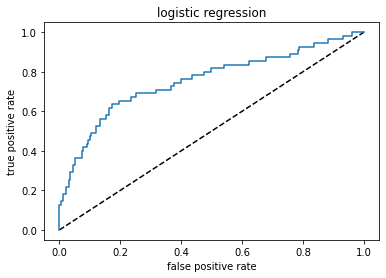

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('logistic regression')
plt.show()

In [78]:
auc_score=roc_auc_score(y_test,LR.predict(x_test))

In [79]:
auc_score

0.6121212121212121

# SAVING THE MODEL

In [80]:
import joblib

In [81]:
joblib.dump(ABC,'WA_Fn-UseC_-HR-Employee-Attrition.csv.pkl')

['WA_Fn-UseC_-HR-Employee-Attrition.csv.pkl']